In [15]:
#project_name = "."
#project_name = "jfreechart"
#project_name = "argouml"
project_name = "weka"

In [16]:
import json
import pandas as pd

package_dependency_file = "input/" + project_name + "/all-package-deps.cmr"
with open(package_dependency_file, 'r') as file:
    package_dependency_data = json.load(file)

package_id_file = "input/" + project_name + "/idmap.json"
with open(package_id_file, 'r') as file:
    package_id_data = json.load(file)

In [17]:
package_dependency_graph_data = package_dependency_data['graph']
print("Keys in the graph:", package_dependency_graph_data.keys())

Keys in the graph: dict_keys(['vList', 'eList', 'lMap', 'clusterMap'])


In [18]:
# Get key from value
def get_key(val): 
    for key, value in package_id_data['keys'].items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

# Get the package name from the package id
def get_package_name(package_id):
    package_name_with_prefix = get_key(package_id)
    package_name = package_name_with_prefix.split('P')[1]
    return package_name

In [19]:
# Generate the graph data
import networkx as nx

G = nx.MultiDiGraph()

def add_nodes_to_graph(graph, nodes):
    for node in nodes:
        package_id = node['type']
        package_name = get_package_name(package_id)
        print("Package name:", package_name)
        graph.add_node(package_name)
        
add_nodes_to_graph(G, package_dependency_graph_data['vList'])

Package name: weka.classifiers.functions.neural
Package name: weka.core.neighboursearch.balltrees
Package name: weka.core.tokenizers
Package name: weka.core.neighboursearch.covertrees
Package name: weka.core.expressionlanguage.common
Package name: weka.datagenerators.clusterers
Package name: weka.classifiers.pmml.consumer
Package name: weka.core.stopwords
Package name: weka.gui.simplecli
Package name: weka.classifiers.rules
Package name: weka.classifiers.trees.j48
Package name: weka.gui.treevisualizer
Package name: weka.core.xml
Package name: weka.gui.hierarchyvisualizer
Package name: weka.gui.explorer
Package name: weka.core.logging
Package name: weka.gui.scripting
Package name: weka.experiment
Package name: weka.knowledgeflow.steps
Package name: weka.core.pmml.jaxbbindings
Package name: weka.classifiers.rules.part
Package name: weka.gui
Package name: weka.classifiers.bayes.net.search
Package name: weka.core.metastore
Package name: weka.classifiers.evaluation.output.prediction
Package

In [20]:
def add_edges_to_graph(graph, edgeList):
    for edges in edgeList:
        for edge in edges['L']:
            source_package_id = edge['s']
            source_package_name = get_package_name(source_package_id)
            destination_package_id = edge['d']
            destination_package_name = get_package_name(destination_package_id)
            weight = edge['w']
            print(f"Edge: {source_package_name} -> {destination_package_name}, weight: {weight}")
            graph.add_edge(source_package_name, destination_package_name, weight=weight)

add_edges_to_graph(G, package_dependency_graph_data['eList'])

Edge: weka.classifiers.meta -> weka.estimators, weight: 2
Edge: weka.classifiers.meta -> weka.estimators, weight: 5
Edge: weka.classifiers.meta -> weka.estimators, weight: 4
Edge: weka.gui.sql -> weka.gui, weight: 3
Edge: weka.gui.sql -> weka.gui, weight: 9
Edge: weka.gui.sql -> weka.gui, weight: 6
Edge: weka.gui.sql -> weka.gui, weight: 4
Edge: weka.classifiers.meta -> weka.filters, weight: 3
Edge: weka.classifiers.meta -> weka.filters, weight: 6
Edge: weka.classifiers.meta -> weka.filters, weight: 2
Edge: weka.attributeSelection -> weka.core.converters, weight: 2
Edge: weka.attributeSelection -> weka.core.converters, weight: 2
Edge: weka.attributeSelection -> weka.core.converters, weight: 2
Edge: weka.gui.knowledgeflow.steps -> weka.gui.beans, weight: 3
Edge: weka.gui.knowledgeflow.steps -> weka.gui.beans, weight: 4
Edge: weka.gui.knowledgeflow.steps -> weka.gui.beans, weight: 4
Edge: weka.gui.knowledgeflow.steps -> weka.gui.beans, weight: 3
Edge: weka.classifiers.meta -> weka.filter

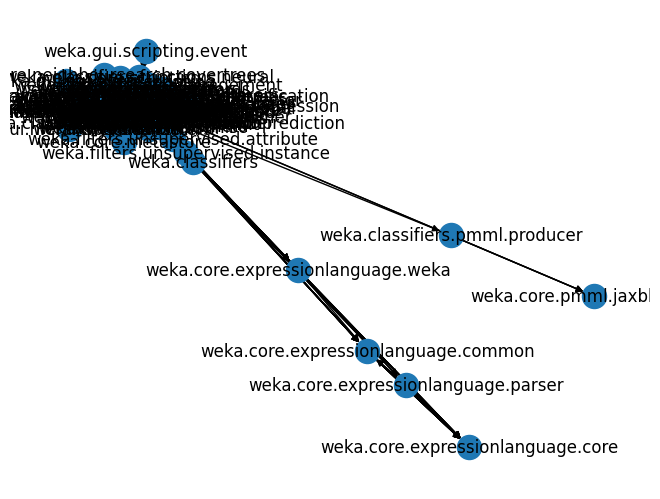

In [21]:
# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [22]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t')
    return data

def remove_empty_rows(data):
    data = data.dropna(subset=['Name'])
    return data

def remove_unnamed_columns(data):
    data = data.filter(regex='^(?!Unnamed.*)')
    return data

def remove_nan_columns(data):
    data = data.dropna(axis=1, how='all')
    return data

def convert_ordinal_to_numerical(data):
    ordinal_mapping = {
        'low': 1,
        'low-medium': 2,
        'medium-high': 3,
        'high': 4,
        'very-high': 5
    }
    columns_to_convert = ['Complexity', 'Coupling', 'Size', 'Lack of Cohesion']
    for column in columns_to_convert:
        data[column] = data[column].replace(ordinal_mapping)
    return data

dataset_file = "input/" + project_name + "/package-metrics-dataset.csv"
dataset = load_data(dataset_file)
dataset = remove_empty_rows(dataset)
dataset = remove_unnamed_columns(dataset)
dataset = remove_nan_columns(dataset)
dataset = convert_ordinal_to_numerical(dataset)

print(dataset.head())

                      QualifiedName                     Name  Complexity   
1                     <Package>weka                     weka           1  \
2        <Package>weka.associations        weka.associations           4   
3  <Package>weka.attributeSelection  weka.attributeSelection           4   
4         <Package>weka.classifiers         weka.classifiers           3   
5   <Package>weka.classifiers.bayes   weka.classifiers.bayes           2   

   Coupling  Size  Lack of Cohesion  #(C&I)    #C   #I     LOC     AC    EC   
1         1     1                 1     2.0   2.0  0.0   204.0    1.0   1.0  \
2         3     3                 1    29.0  26.0  3.0  3917.0    8.0  19.0   
3         4     4                 1    31.0  25.0  6.0  6166.0    8.0  21.0   
4         4     3                 1    27.0  20.0  7.0  3186.0  114.0  24.0   
5         2     3                 1     7.0   7.0  0.0  1640.0   37.0   6.0   

     Abs    Ins     ND     WMC  
1  0.000  0.500  0.500    74.0  
2 

In [23]:
def label_problematic_component(row, problematic_class_threshold=3, highly_problematic_class_threshold=4):
    if row['Complexity'] >= problematic_class_threshold and \
        row['Coupling'] >= problematic_class_threshold or \
        row['Lack of Cohesion'] >= problematic_class_threshold:
        return 1
    elif row['Complexity'] >= highly_problematic_class_threshold or \
        row['Coupling'] >= highly_problematic_class_threshold or \
        row['Lack of Cohesion'] >= highly_problematic_class_threshold or \
        row['Size'] >= highly_problematic_class_threshold:
        return 1
    else:
        return 0


# Label the dataset
dataset['Problematic'] = dataset.apply(label_problematic_component, axis=1)

# Count the number of Problematic Classes
num_dataset_rows = dataset.shape[0]
num_problematic_classes = dataset[dataset['Problematic'] == 1].shape[0]
print(f'Number of instances in the dataset: {num_dataset_rows}')
print(f'Number of Problematic Components in the dataset: {num_problematic_classes}')

Number of instances in the dataset: 89
Number of Problematic Components in the dataset: 30


In [24]:
def remove_labeling_columns(data):
    data = data.drop(['QualifiedName', 'Complexity', 'Coupling', 'Size', 'Lack of Cohesion'], axis=1)
    return data

dataset = remove_labeling_columns(dataset)
print(dataset.head())

                      Name  #(C&I)    #C   #I     LOC     AC    EC    Abs   
1                     weka     2.0   2.0  0.0   204.0    1.0   1.0  0.000  \
2        weka.associations    29.0  26.0  3.0  3917.0    8.0  19.0  0.276   
3  weka.attributeSelection    31.0  25.0  6.0  6166.0    8.0  21.0  0.387   
4         weka.classifiers    27.0  20.0  7.0  3186.0  114.0  24.0  0.704   
5   weka.classifiers.bayes     7.0   7.0  0.0  1640.0   37.0   6.0  0.000   

     Ins     ND     WMC  Problematic  
1  0.500  0.500    74.0            0  
2  0.704  0.020  1061.0            1  
3  0.724  0.111  1681.0            1  
4  0.174  0.122   877.0            1  
5  0.140  0.860   448.0            0  


In [25]:
# Embedding software metrics in dataset to nodes in the graph
def get_node_embedding(node, data):
    node_embedding = data.loc[data['Name'] == node]
    return node_embedding

def get_node_embedding_list(graph, data):
    node_embedding_list = []
    for node, node_data in graph.nodes(data=True):
        node_embedding = get_node_embedding(node, data)
        node_data['NumberOfEntities'] = node_embedding['#(C&I)'].iloc[0]
        node_data['NumberOfClasses'] = node_embedding['#C'].iloc[0]
        node_data['NumberOfInterface'] = node_embedding['#I'].iloc[0]
        node_data['LOC'] = node_embedding['LOC'].iloc[0]
        node_data['AC'] = node_embedding['AC'].iloc[0]
        node_data['EC'] = node_embedding['EC'].iloc[0]
        node_data['Abstractness'] = node_embedding['Abs'].iloc[0]
        node_data['Instability'] = node_embedding['Ins'].iloc[0]
        node_data['NormalizedDistances'] = node_embedding['ND'].iloc[0]
        node_data['WMC'] = node_embedding['WMC'].iloc[0]
        node_data['Problematic'] = node_embedding['Problematic'].iloc[0]
        print('node_data: ', node_data)
        node_embedding_list.append(node_data)
    return node_embedding_list

node_embedding_list = get_node_embedding_list(G, dataset)
print(node_embedding_list)

node_data:  {'NumberOfEntities': 5.0, 'NumberOfClasses': 4.0, 'NumberOfInterface': 1.0, 'LOC': 448.0, 'AC': 1.0, 'EC': 4.0, 'Abstractness': 0.4, 'Instability': 0.8, 'NormalizedDistances': 0.2, 'WMC': 164.0, 'Problematic': 0}
node_data:  {'NumberOfEntities': 13.0, 'NumberOfClasses': 13.0, 'NumberOfInterface': 0.0, 'LOC': 1329.0, 'AC': 1.0, 'EC': 9.0, 'Abstractness': 0.154, 'Instability': 0.9, 'NormalizedDistances': 0.054, 'WMC': 328.0, 'Problematic': 0}
node_data:  {'NumberOfEntities': 6.0, 'NumberOfClasses': 6.0, 'NumberOfInterface': 0.0, 'LOC': 334.0, 'AC': 6.0, 'EC': 6.0, 'Abstractness': 0.333, 'Instability': 0.5, 'NormalizedDistances': 0.167, 'WMC': 105.0, 'Problematic': 0}
node_data:  {'NumberOfEntities': 1.0, 'NumberOfClasses': 1.0, 'NumberOfInterface': 0.0, 'LOC': 40.0, 'AC': 1.0, 'EC': 1.0, 'Abstractness': 0.0, 'Instability': 0.5, 'NormalizedDistances': 0.5, 'WMC': 13.0, 'Problematic': 0}
node_data:  {'NumberOfEntities': 62.0, 'NumberOfClasses': 59.0, 'NumberOfInterface': 3.0, '

In [26]:
# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: weka.classifiers.functions.neural, embedding: {'NumberOfEntities': 5.0, 'NumberOfClasses': 4.0, 'NumberOfInterface': 1.0, 'LOC': 448.0, 'AC': 1.0, 'EC': 4.0, 'Abstractness': 0.4, 'Instability': 0.8, 'NormalizedDistances': 0.2, 'WMC': 164.0, 'Problematic': 0}
Node: weka.core.neighboursearch.balltrees, embedding: {'NumberOfEntities': 13.0, 'NumberOfClasses': 13.0, 'NumberOfInterface': 0.0, 'LOC': 1329.0, 'AC': 1.0, 'EC': 9.0, 'Abstractness': 0.154, 'Instability': 0.9, 'NormalizedDistances': 0.054, 'WMC': 328.0, 'Problematic': 0}
Node: weka.core.tokenizers, embedding: {'NumberOfEntities': 6.0, 'NumberOfClasses': 6.0, 'NumberOfInterface': 0.0, 'LOC': 334.0, 'AC': 6.0, 'EC': 6.0, 'Abstractness': 0.333, 'Instability': 0.5, 'NormalizedDistances': 0.167, 'WMC': 105.0, 'Problematic': 0}
Node: weka.core.neighboursearch.covertrees, embedding: {'NumberOfEntities': 1.0, 'NumberOfClasses': 1.0, 'NumberOfInterface': 0.0, 'LOC': 40.0, 'AC': 1.0, 'EC': 1.0, 'Abstractness': 0.0, 'Instability': 0.5

In [27]:
# Save the graph data to a file
import pickle

output_graph_data_file = "output/" + project_name + "/graph_data_for_problematic_component.pickle"
with open(output_graph_data_file, 'wb') as file:
    pickle.dump(G, file)

In [28]:
# Load the graph data from a file
import pickle

with open(output_graph_data_file, 'rb') as file:
    G = pickle.load(file)

# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: weka.classifiers.functions.neural, embedding: {'NumberOfEntities': 5.0, 'NumberOfClasses': 4.0, 'NumberOfInterface': 1.0, 'LOC': 448.0, 'AC': 1.0, 'EC': 4.0, 'Abstractness': 0.4, 'Instability': 0.8, 'NormalizedDistances': 0.2, 'WMC': 164.0, 'Problematic': 0}
Node: weka.core.neighboursearch.balltrees, embedding: {'NumberOfEntities': 13.0, 'NumberOfClasses': 13.0, 'NumberOfInterface': 0.0, 'LOC': 1329.0, 'AC': 1.0, 'EC': 9.0, 'Abstractness': 0.154, 'Instability': 0.9, 'NormalizedDistances': 0.054, 'WMC': 328.0, 'Problematic': 0}
Node: weka.core.tokenizers, embedding: {'NumberOfEntities': 6.0, 'NumberOfClasses': 6.0, 'NumberOfInterface': 0.0, 'LOC': 334.0, 'AC': 6.0, 'EC': 6.0, 'Abstractness': 0.333, 'Instability': 0.5, 'NormalizedDistances': 0.167, 'WMC': 105.0, 'Problematic': 0}
Node: weka.core.neighboursearch.covertrees, embedding: {'NumberOfEntities': 1.0, 'NumberOfClasses': 1.0, 'NumberOfInterface': 0.0, 'LOC': 40.0, 'AC': 1.0, 'EC': 1.0, 'Abstractness': 0.0, 'Instability': 0.5